In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("2.01.+Admittance.csv")
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


# Create dummies

In [3]:
data = raw_data.copy()
data["Admitted"] = data["Admitted"].map({"Yes":1, "No":0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


# Variables

In [4]:
y = data["Admitted"]
x1 = data["SAT"]

## Scatter Plot

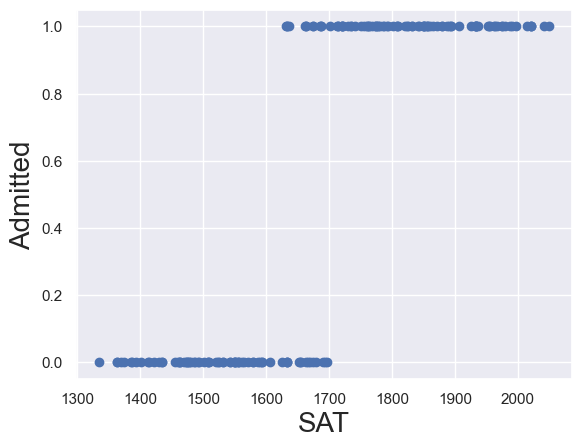

In [5]:
plt.scatter(x1, y, color="C0")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.show()

### Plot with a regression line

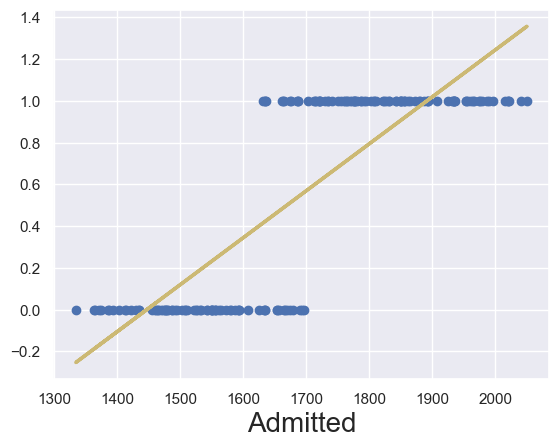

In [6]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
result_lin = reg_lin.fit()

plt.scatter(x1, y, color="C0")
y_hat = x1 * result_lin.params[1] + result_lin.params[0]

plt.plot(x1, y_hat, lw=2.5, color="C8")
plt.xlabel("SAT", fontsize=20)
plt.xlabel("Admitted", fontsize=20)
plt.show()

- #### As can be seen, model is not be fitted to our data. because we used linear regression, but our data is not linear. its categorical. that's why we cannot use the linear regression in this data. we must use non-linear approaches

## Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


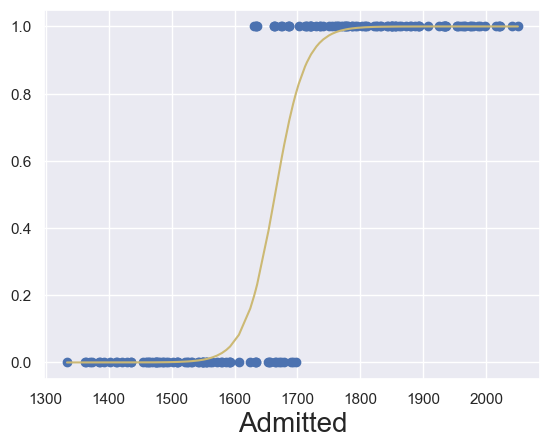

In [7]:
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()


def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color="C0")
plt.xlabel("SAT", fontsize=20)
plt.xlabel("Admitted", fontsize=20)
plt.plot(x_sorted, f_sorted, color="C8")
plt.show()

- ### When the SAT score is relatively low, the probability of getting admitted is zero.
- ###  When the SAT score is relatively high, the probability of getting admitted is 1.
- ### A score in between 1600 and 1750 is uncertain. For instance, if your score is 1650, you have rougly 50% chance of getting in 

# Summary Table

In [8]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.7992
Time:                        20:03:22   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- #### MLE (Maximum likelihood estimation): a function which estimates how likely it is that the model at hand describes the real underlying relationshio of the variables. BASICALLY, the bigger the likelihood function, the higher the probablity that our model is correct. MLE, tries to maximize the likelihood function.

- #### Log-Likelihood: Log-likelihood are almost but not always is negative. The bigger is better.
- #### LL-Null(Log Likelihood-Null): the log-likelihood of a model which has no independent variables.
- #### LLR p-value: measures if our model is statistically different from LL-null, a.k.a a useless model
- #### Pseudo R-squ: This measures is mostly useful for comparing variations of the same model. There is not exactly r-square for logistic regression. there are different approaches. between 0.2 - 0.4 is ok but not always.